<a href="https://colab.research.google.com/github/suresh-venkate/Code_Repositories/blob/main/Deep_Learning/Experiments/VIT/test_vit.py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/lucidrains/vit-pytorch.git

Cloning into 'vit-pytorch'...
remote: Enumerating objects: 797, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 797 (delta 106), reused 91 (delta 70), pack-reused 647
Receiving objects: 100% (797/797), 6.50 MiB | 13.12 MiB/s, done.
Resolving deltas: 100% (541/541), done.


In [3]:
%cd vit-pytorch/

/content/vit-pytorch


In [4]:
!ls

examples  images  LICENSE  README.md  setup.py	vit_pytorch


In [6]:
!pip install einops

In [7]:
import torch
from vit_pytorch import ViT

In [8]:
v = ViT(
    image_size = 256,
    patch_size = 32,
    num_classes = 1000,
    dim = 1024,
    depth = 6,
    heads = 16,
    mlp_dim = 2048,
    dropout = 0.1,
    emb_dropout = 0.1
)

img = torch.randn(1, 3, 256, 256)

preds = v(img) # (1, 1000)

In [15]:
label_pred = preds.argmax(dim = 1).cpu().numpy()[0] 
label_pred

360

In [10]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


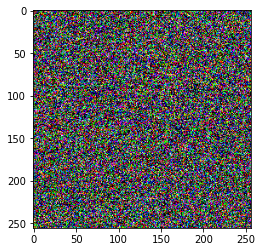

In [14]:
img_plot = img.squeeze().permute(1, 2, 0)
plt.imshow(img_plot)

In [16]:
import requests

In [17]:
url = "https://thumbs.dreamstime.com/z/golden-retriever-dog-21668976.jpg"
response = requests.get(url)
file = open("sample_image.png", "wb")
file.write(response.content)
file.close()

In [18]:
import cv2

In [20]:
img = cv2.imread("sample_image.png", cv2.IMREAD_COLOR) # Load image using cv2 as a 3-channel RGB image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert image to RGB

In [30]:
from torchvision.transforms import ToTensor, Normalize, Compose, Resize
img_transf = Compose([ToTensor(), Resize((256, 256))])
img_aug = img_transf(img)

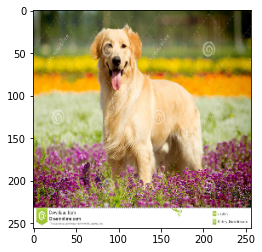

In [40]:
img_plot = img_aug.squeeze().permute(1, 2, 0)
plt.imshow(img_plot)
plt.show()

In [41]:
img_aug.unsqueeze(0).shape

torch.Size([1, 3, 256, 256])

In [48]:
preds = v(img_aug.unsqueeze(0))
label_pred = preds.argmax(dim = 1).cpu().numpy()[0] 
label_pred

81